## Name : Tazmeen Afroz
## Roll No: 22p-9252
### LAB TASK -8

## Problem: 1 - Customer Segmentation using K-means Clustering.


In [1]:
import pandas as pd 
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
# Drop duplicates
df.drop_duplicates(inplace=True)

#Encoding
encoder = LabelEncoder()
gender_encoded = encoder.fit_transform(df['Gender'])
df['Gender'] = gender_encoded

# Replace missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(df.head())
# Normalization
print("After Normalization :")
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Select the relevant features  
X = df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]
X.head()



   CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
0         1.0     1.0  19.0                15.0                    39.0
1         2.0     1.0  21.0                15.0                    81.0
2         3.0     0.0  20.0                16.0                     6.0
3         4.0     0.0  23.0                16.0                    77.0
4         5.0     0.0  31.0                17.0                    40.0
After Normalization :


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [3]:

#Model
kmeans = KMeans(n_clusters=3, random_state=0,n_init=10)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)

labels = kmeans.labels_
print("\nLabels:")
print(labels)


Centroids:
[[ 1.12815215  0.74307816  0.06431159 -0.79449512]
 [ 0.03792108 -0.77529133  0.04688104  0.88056434]
 [-0.88640526  0.44680201 -0.10812358 -0.5442077 ]]

Labels:
[1 1 2 1 2 1 2 1 0 1 0 1 2 1 0 1 2 1 0 1 0 1 2 1 2 1 2 1 2 1 0 1 0 1 2 1 2
 1 2 1 2 1 0 1 2 1 2 2 2 2 2 1 2 0 2 0 2 0 1 0 0 1 2 2 0 1 2 2 1 2 0 2 2 2
 0 1 2 0 1 2 0 0 0 2 1 0 2 1 1 2 2 1 0 2 2 1 2 1 0 1 1 2 0 1 0 1 2 0 0 0 0
 1 2 1 1 1 2 2 2 2 1 2 2 1 2 1 0 1 0 1 0 1 2 1 0 1 2 1 0 1 2 1 2 1 0 1 0 1
 2 1 0 1 2 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 2 1 0 1 0 1 2 1 0 1 0 1 2 1 0 1 2
 1 2 1 2 1 2 1 0 1 2 1 2 1 0 1]


In [4]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 1,
       2, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 0, 2, 2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1], dtype=int32)

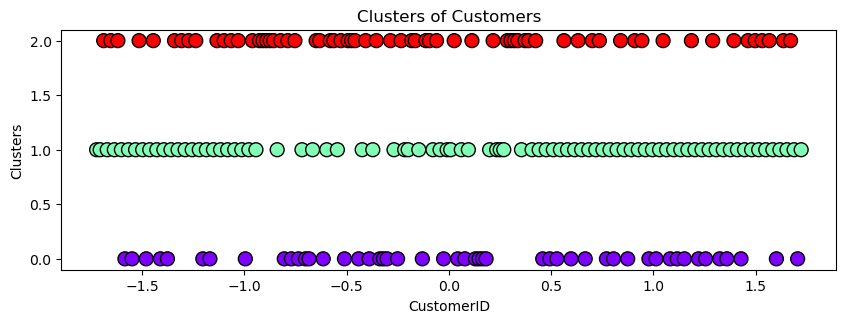

In [5]:
#Visualization
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,3))

plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9)

data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 

plt.scatter(data_with_clusters['CustomerID'], labels, c=data_with_clusters['Clusters'], cmap='rainbow', s=100,edgecolors='black')

plt.title('Clusters of Customers')
plt.xlabel('CustomerID')
plt.ylabel('Clusters')

plt.show()


## Problem: 2 - Optimal number of clusters

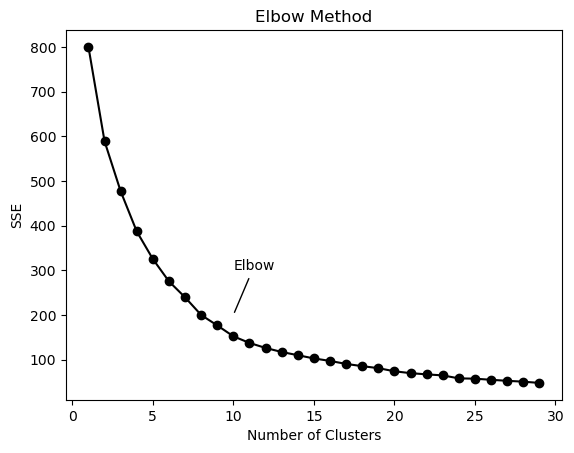

In [6]:
sse = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10, max_iter=1000)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

number_clusters = range(1,30)
plt.plot(number_clusters, sse, marker='o', color='black')
plt.annotate('Elbow', xy=(10, 200), xytext=(10, 300), arrowprops={'arrowstyle': '-'})
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [7]:

kmeans = KMeans(n_clusters=10, random_state=0, n_init=10)
kmeans.fit(X)


centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)


labels = kmeans.labels_
print("\nLabels:")
print(labels)

Centroids:
[[ 1.12815215 -0.39989994  1.01344075  1.26040667]
 [-0.88640526 -0.78153925 -0.12214217 -0.11957041]
 [-0.88640526  0.35421988  1.24912183 -1.14745442]
 [ 1.12815215  1.43505777 -0.45298304 -0.40195247]
 [ 1.12815215 -0.97602698 -0.73705168  0.41603773]
 [-0.88640526 -0.47793198  0.97284787  1.22158511]
 [-0.7425083   0.16967696 -1.31640908 -1.1668652 ]
 [ 1.12815215 -0.02700694  0.96701244 -1.39716754]
 [-0.88640526 -0.96084556 -1.33087991  1.17778643]
 [-0.88640526  1.09830638 -0.24158313 -0.04807901]]

Labels:
[4 4 6 8 6 8 6 8 3 8 3 8 6 8 6 4 6 4 3 8 4 4 6 4 6 4 6 4 6 8 3 8 3 4 6 8 6
 8 6 8 9 4 3 1 6 8 9 1 1 1 9 4 1 3 9 3 9 3 1 3 3 4 9 9 3 4 9 9 4 1 3 9 9 9
 3 4 9 4 1 9 3 4 3 9 1 3 9 1 1 9 9 4 3 1 1 4 9 1 3 4 1 9 3 4 3 1 9 3 3 3 3
 1 1 4 1 1 9 9 9 9 4 1 1 0 1 5 7 0 3 0 7 0 1 5 7 5 2 0 7 5 2 0 1 5 7 0 7 5
 2 0 7 0 2 5 2 5 7 5 7 5 9 5 7 5 7 5 7 5 2 0 7 0 7 0 2 5 7 0 7 0 2 5 7 5 2
 0 2 0 2 5 2 5 7 5 2 5 2 0 7 0]


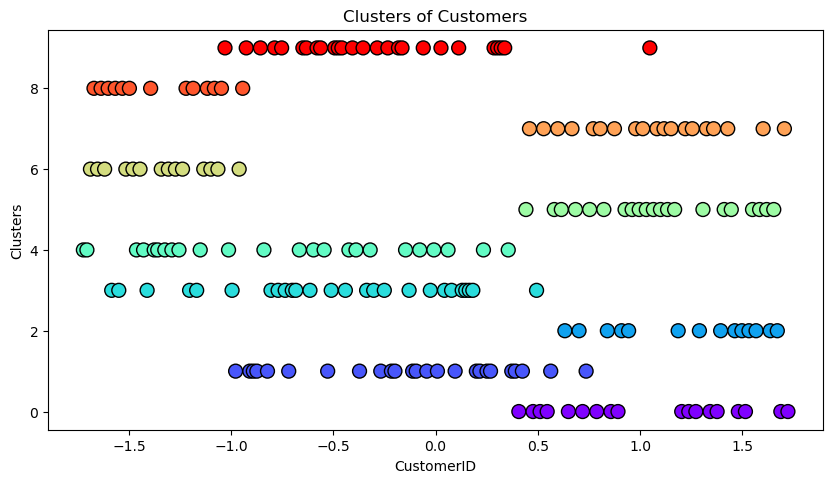

In [8]:

identified_clusters = kmeans.fit_predict(X)
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters

fig = plt.figure(figsize=(10,5))

plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9)

data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 

plt.scatter(data_with_clusters['CustomerID'], labels, c=data_with_clusters['Clusters'], cmap='rainbow', s=100,edgecolors='black')

plt.title('Clusters of Customers')
plt.xlabel('CustomerID')
plt.ylabel('Clusters')

plt.show()